PROJECT OF RETIAL ANOMALY DETECTION

At first, we import necessary libraries and load the data from retail1.csv 

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv(r'C:\Users\bichl\Documents\Machine_Learning _Project\data\retail1.csv')
#C:\Users\bichl\Documents\Machine_Learning _Project\data
print(df)

print(df.columns)
df.shape
df.dtypes
df.describe()




       Unnamed: 0  DocumentID        Date   SKU         Price     Discount  \
0               0         716  2019-09-23  1039    381.780000    67.372540   
1               1         716  2019-09-23   853    593.220000     0.000340   
2               2         716  2019-09-23   862    423.730000    -0.001190   
3               3         716  2019-09-23   868    201.700000    35.588140   
4               4         716  2019-09-23  2313    345.760000    61.019660   
5               5         716  2019-09-23  2355    406.780000   101.694580   
6               6         716  2019-09-23  2529    542.380000   135.586100   
7               7         460  2019-04-13  2361  13983.050000     0.000000   
8               8         461  2019-04-27  2723     30.000000     0.000000   
9               9         462  2019-05-30   655   2500.000000     0.000000   
10             10         463  2019-07-31  2546  11016.950000     0.000000   
11             11         464  2019-08-07  2832   1700.000000   

,Unnamed: 0,DocumentID,SKU,Price,Discount,Customer,Quantity
count,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000
mean,16677.500000,8227.577227,1241.273174,2915.716875,591.249968,307.968581,5.760695
std,9629.192126,4028.047727,893.872164,10285.512325,3508.983569,162.675166,19.550559
min,0.000000,0.000000,0.000000,0.000000,-0.004920,0.000000,0.000000
25%,8338.750000,5399.750000,503.000000,661.016949,95.674576,179.000000,2.000000
50%,16677.500000,8733.000000,1008.000000,1203.389830,195.254237,286.000000,4.000000
75%,25016.250000,10857.000000,2078.250000,2572.194915,423.489661,427.000000,4.000000
max,33355.000000,15751.000000,2904.000000,522767.340000,240396.660000,605.000000,1246.000000


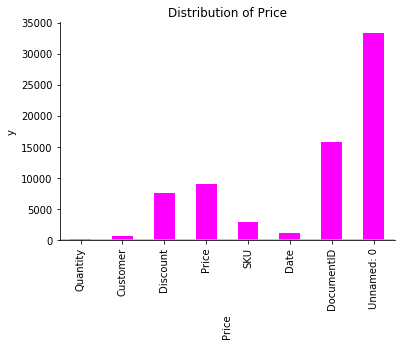

In [27]:
plot1 = df.nunique().plot.bar(color="magenta")
plot1.set_xlabel("x",rotation=90)
plot1.set_ylabel("y",rotation=90)
plot1.invert_xaxis()


df.sort_values('Price',ascending=False).head(5)

df_anomaly = df.sort_values('Price', ascending = False).head(2)
df_anomaly.head()

list(df.sort_values('Price', ascending = False).head(2).index)
df = df.drop(list(df.sort_values('Price', ascending = False).head(2).index))
df.sort_values('Price', ascending = False).head(10)

plot2 = sns.distplot(df['Price'],color="cyan")
plt.title("Distribution of Price")
sns.despine()

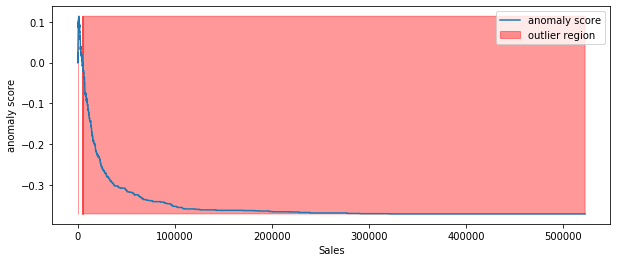

In [ ]:


isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Price'].values.reshape(-1, 1))

xx = np.linspace(df['Price'].min(), df['Price'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();


In [23]:
df_anomaly = df.sort_values('Price', ascending = False).head(2)
df_anomaly.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,AnomalyScore
29772,29772,14458,2022-07-27,978,522767.34,240396.66,418,612.0,-0.371078
31595,31595,14974,2022-10-08,2817,508240.00,0.00,418,1.0,-0.371078


In [24]:

df['AnomalyScore'] = anomaly_score
df.sort_values('AnomalyScore',ascending = False).head()

df_anomaly = pd.concat([df_anomaly,
        df.sort_values('AnomalyScore',ascending = True).head(10)]
)
df_anomaly.head()

list(df.sort_values('AnomalyScore',ascending = False).head(10).index)
df.head()

df[df['Price'].isna()].head()

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Price'].values.reshape(-1, 1))

IsolationForest()

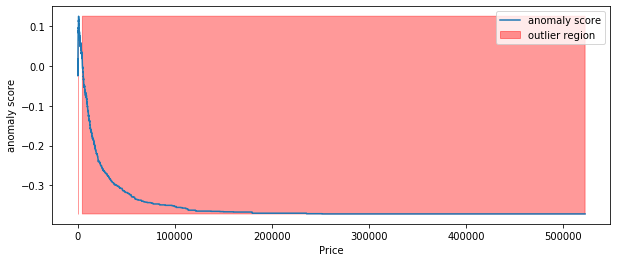

In [25]:

xx = np.linspace(df['Price'].min(), df['Price'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Price')
plt.show();